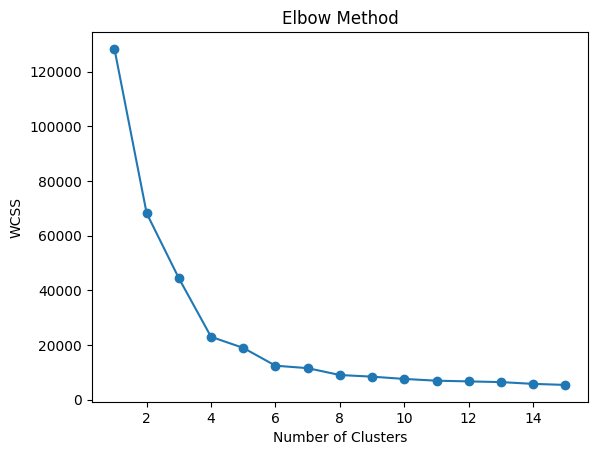

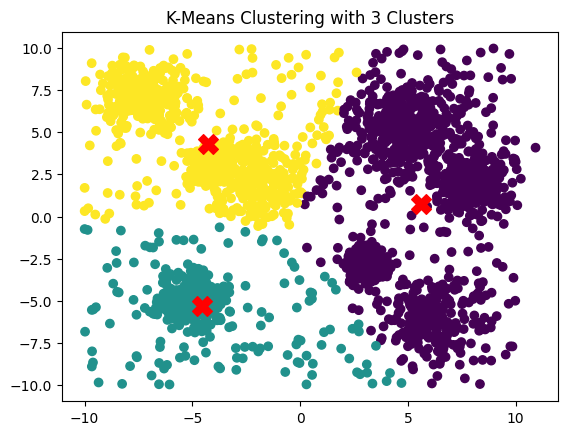

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv("A3_P1.csv")

wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 16), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

optimal_clusters = 3  # Set this based on your elbow plot

kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(data)

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.show()


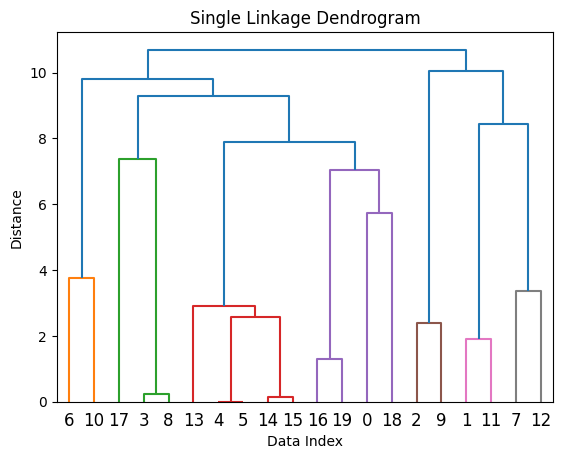

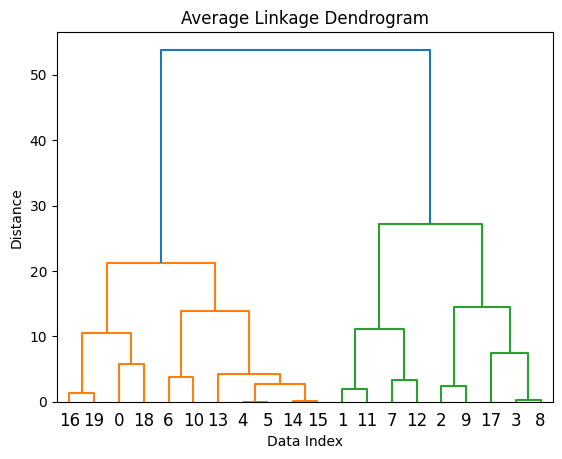

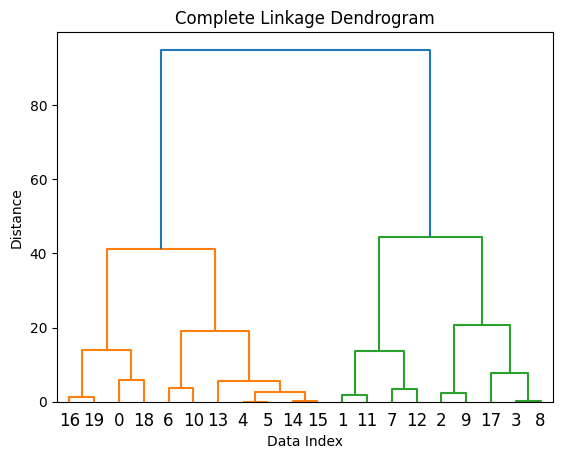

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram

data = pd.read_csv("A3_P2.csv").values

def linkage_distance(cluster1, cluster2, method):
    d = cdist(cluster1, cluster2)
    if method == 'single':
        return np.min(d)
    elif method == 'complete':
        return np.max(d)
    elif method == 'average':
        return np.mean(d)

def hac(data, method):
    n = len(data)
    clusters = {i: [i] for i in range(n)}
    current_cluster_id = n
    Z = []

    while len(clusters) > 1:
        keys = list(clusters.keys())
        min_dist = float('inf')
        to_merge = (None, None)

        for i in range(len(keys)):
            for j in range(i + 1, len(keys)):
                c1 = data[clusters[keys[i]]]
                c2 = data[clusters[keys[j]]]
                dist = linkage_distance(c1, c2, method)
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (keys[i], keys[j])

        i, j = to_merge
        new_cluster = clusters[i] + clusters[j]
        Z.append([i, j, min_dist, len(new_cluster)])
        del clusters[i]
        del clusters[j]
        clusters[current_cluster_id] = new_cluster
        current_cluster_id += 1

    return np.array(Z)

methods = ['single', 'average', 'complete']
for method in methods:
    Z = hac(data, method)
    plt.figure()
    dendrogram(Z)
    plt.title(f'{method.capitalize()} Linkage Dendrogram')
    plt.xlabel('Data Index')
    plt.ylabel('Distance')
    plt.show()
